In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
X_train_orig = pd.read_csv('training_set_features.csv')
X_test_orig = pd.read_csv('test_set_features.csv')
y_train_orig = pd.read_csv('training_set_labels.csv')

In [10]:
X_train_orig.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
X_test_orig.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [4]:
y_train_orig.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
len(X_train_orig)

26707

In [12]:
print(X_train_orig['employment_occupation'].isna().sum())
print((X_train_orig['employment_occupation'] == pd.NA).sum())

print(X_train_orig['employment_industry'].isna().sum())
print((X_train_orig['employment_industry'] == pd.NA).sum())

13470
0
13330
0


In [13]:
X_train_orig.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [15]:
X_train_orig.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [17]:
'''
float_orig_train_columns = X_train_orig.select_dtypes(include=['float64'])
float_orig_test_columns = X_test_orig.select_dtypes(include=['float64'])

X_train_orig_fillna = X_train_orig.copy()
X_test_orig_fillna = X_test_orig.copy()

X_train_orig_fillna[float_orig_train_columns.columns] = float_orig_train_columns.fillna(-1) #fillna with -1 for ranging float64 features
X_test_orig_fillna[float_orig_test_columns.columns] = float_orig_test_columns.fillna(-1)

#covert float64 to int64
X_train_orig_fillna[float_orig_train_columns.columns] = X_train_orig_fillna[float_orig_train_columns.columns].astype('int64') 
X_test_orig_fillna[float_orig_test_columns.columns] = X_test_orig_fillna[float_orig_test_columns.columns].astype('int64')
'''

"\nfloat_orig_train_columns = X_train_orig.select_dtypes(include=['float64'])\nfloat_orig_test_columns = X_test_orig.select_dtypes(include=['float64'])\n\nX_train_orig_fillna = X_train_orig.copy()\nX_test_orig_fillna = X_test_orig.copy()\n\nX_train_orig_fillna[float_orig_train_columns.columns] = float_orig_train_columns.fillna(-1) #fillna with -1 for ranging float64 features\nX_test_orig_fillna[float_orig_test_columns.columns] = float_orig_test_columns.fillna(-1)\n\n#covert float64 to int64\nX_train_orig_fillna[float_orig_train_columns.columns] = X_train_orig_fillna[float_orig_train_columns.columns].astype('int64') \nX_test_orig_fillna[float_orig_test_columns.columns] = X_test_orig_fillna[float_orig_test_columns.columns].astype('int64')\n"

In [19]:
df = pd.concat([X_train_orig, y_train_orig[['h1n1_vaccine', 'seasonal_vaccine']]], axis=1)
df.set_index('respondent_id', inplace=True)

X_test_orig.set_index('respondent_id', inplace=True)

In [21]:
df.head(7).iloc[:,13:]

,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0


In [153]:
columns = X_test_orig.columns
for col in columns:
    print("\n", X_test_orig[col].value_counts(dropna=False).sort_values(ascending=True))


 h1n1_concern
NaN       85
0.0     3199
3.0     4523
1.0     8158
2.0    10743
Name: count, dtype: int64

 h1n1_knowledge
NaN      122
0.0     2442
2.0     9515
1.0    14629
Name: count, dtype: int64

 behavioral_antiviral_meds
NaN       79
1.0     1322
0.0    25307
Name: count, dtype: int64

 behavioral_avoidance
NaN      213
0.0     7159
1.0    19336
Name: count, dtype: int64

 behavioral_face_mask
NaN       19
1.0     1849
0.0    24840
Name: count, dtype: int64

 behavioral_wash_hands
NaN       40
0.0     4638
1.0    22030
Name: count, dtype: int64

 behavioral_large_gatherings
NaN       72
1.0     9363
0.0    17273
Name: count, dtype: int64

 behavioral_outside_home
NaN       82
1.0     8979
0.0    17647
Name: count, dtype: int64

 behavioral_touch_face
NaN      128
0.0     8406
1.0    18174
Name: count, dtype: int64

 doctor_recc_h1n1
NaN     2160
1.0     5466
0.0    19082
Name: count, dtype: int64

 doctor_recc_seasonal
NaN     2160
1.0     8188
0.0    16360
Name: count, dtype: 

In [25]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

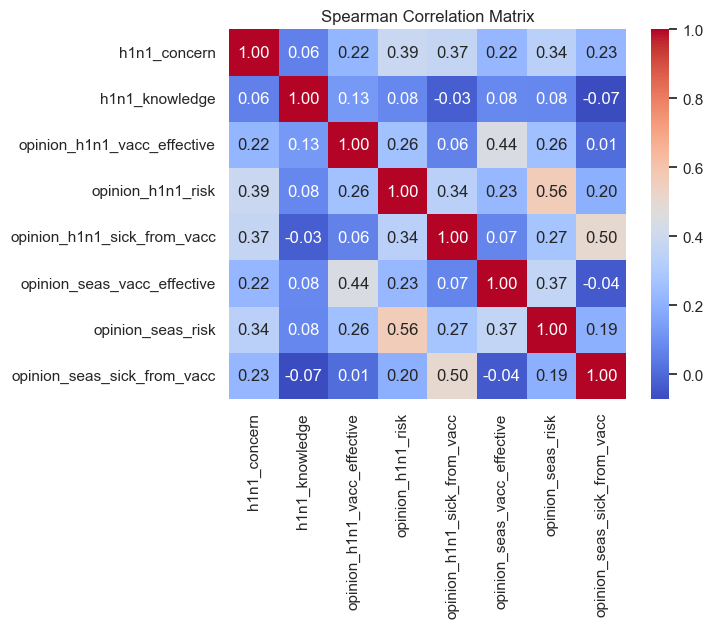

In [27]:
rank_features = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
                 'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']
correlation_matrix = df[rank_features].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

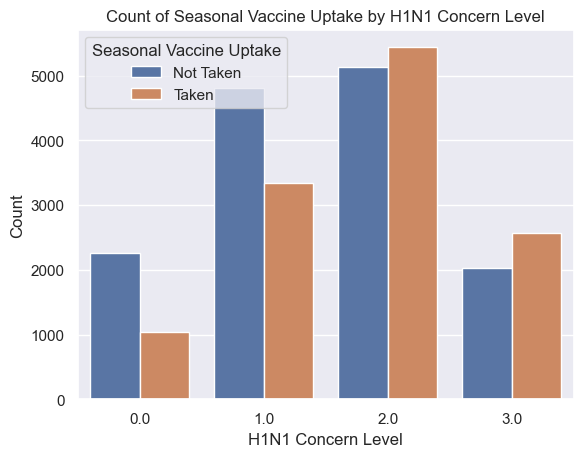

In [29]:
sns.countplot(x='h1n1_concern', hue='seasonal_vaccine', data=df)
plt.title('Count of Seasonal Vaccine Uptake by H1N1 Concern Level')
plt.xlabel('H1N1 Concern Level')  
plt.ylabel('Count')                
plt.legend(title='Seasonal Vaccine Uptake', labels=['Not Taken', 'Taken'])
plt.show()
#plt.xticks(ticks=[0, 1, 2, 3], labels=['Not at all concerned', 'Not very concerned', 'Somewhat concerned', 'Very concerned'])


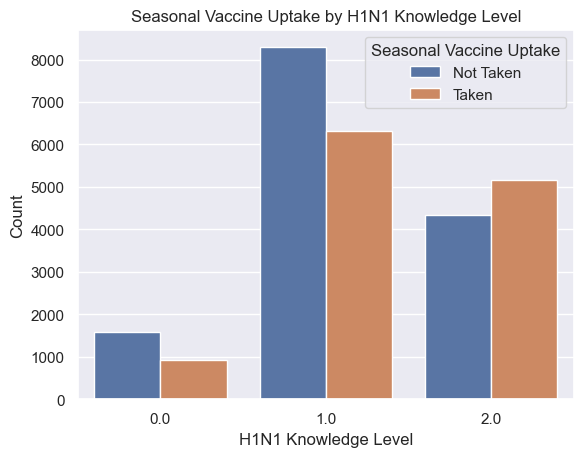

In [31]:
sns.countplot(x='h1n1_knowledge', hue='seasonal_vaccine', data=df)
plt.title('Seasonal Vaccine Uptake by H1N1 Knowledge Level')
plt.ylabel('Count')
plt.xlabel('H1N1 Knowledge Level')
plt.legend(title='Seasonal Vaccine Uptake',labels=['Not Taken', 'Taken'])
plt.show()

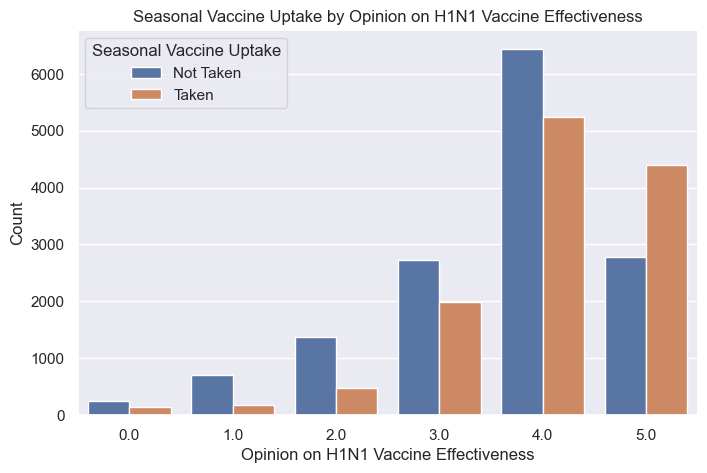

In [33]:
df_copy = df.copy()
df_copy['opinion_h1n1_vacc_effective'] = df_copy['opinion_h1n1_vacc_effective'].fillna(0)
plt.figure(figsize=(8, 5))

sns.countplot(x='opinion_h1n1_vacc_effective', hue='seasonal_vaccine', data=df_copy)

plt.title('Seasonal Vaccine Uptake by Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.legend(title='Seasonal Vaccine Uptake',labels=['Not Taken', 'Taken'])

plt.show()

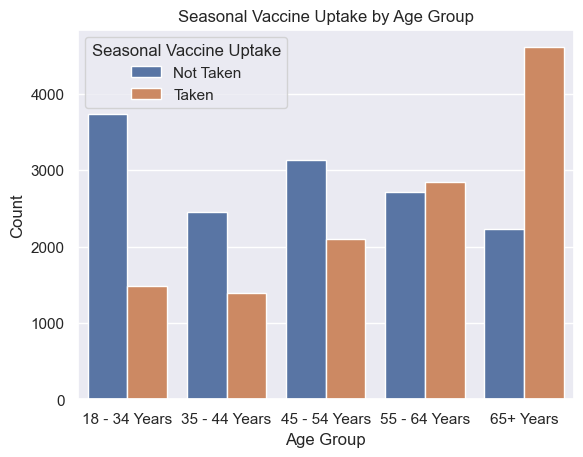

In [35]:

age_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

sns.countplot(x='age_group', hue='seasonal_vaccine', data=df, order=age_order)
plt.title('Seasonal Vaccine Uptake by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Seasonal Vaccine Uptake',labels=['Not Taken', 'Taken'])

plt.show()

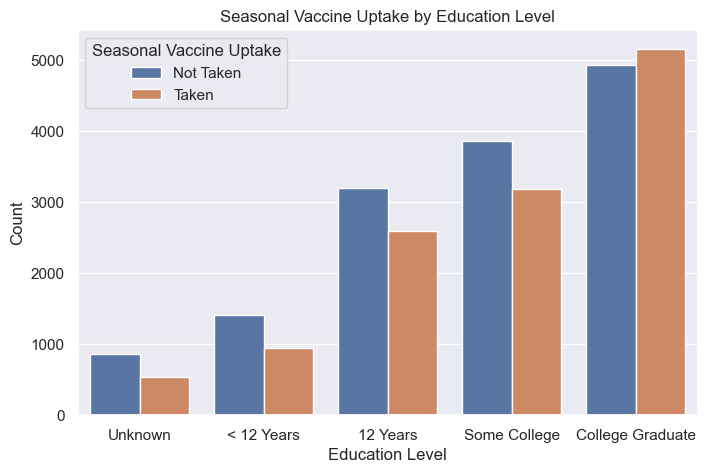

In [37]:

df_copy = df.copy()
df_copy['education'] = df_copy['education'].fillna('Unknown')
plt.figure(figsize=(8, 5))

education_order = ['Unknown','< 12 Years', '12 Years', 'Some College', 'College Graduate']

sns.countplot(x='education', hue='seasonal_vaccine', data=df_copy, order=education_order)
plt.title('Seasonal Vaccine Uptake by Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.legend(title='Seasonal Vaccine Uptake', labels=['Not Taken', 'Taken'])

plt.show()

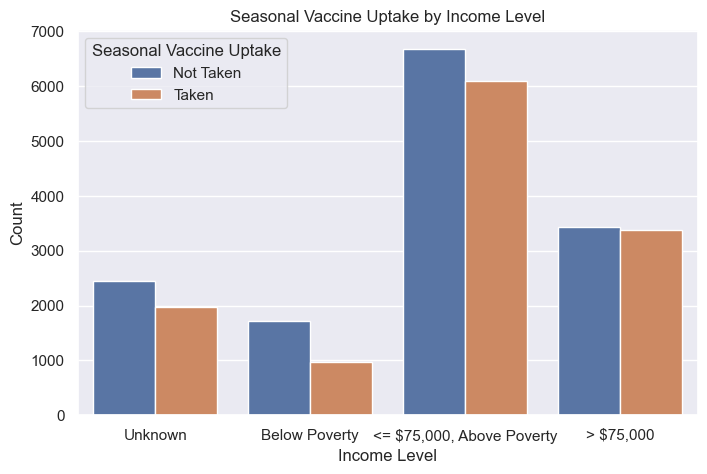

In [39]:

df_copy = df.copy()
df_copy['income_poverty'] = df_copy['income_poverty'].fillna('Unknown')
plt.figure(figsize=(8, 5))

income_order = ['Unknown', 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=df_copy, order=income_order)
plt.title('Seasonal Vaccine Uptake by Income Level')
plt.ylabel('Count')
plt.xlabel('Income Level')
plt.legend(title='Seasonal Vaccine Uptake', labels=['Not Taken', 'Taken'])
plt.show()

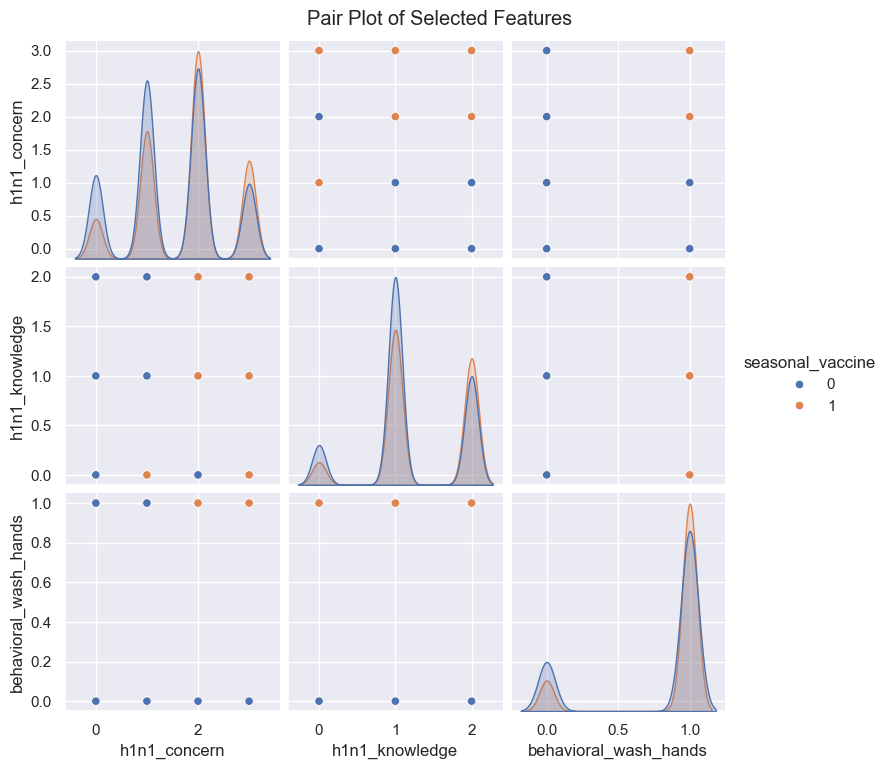

In [41]:
selected_features = df[['seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands']]
sns.pairplot(selected_features, hue='seasonal_vaccine')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

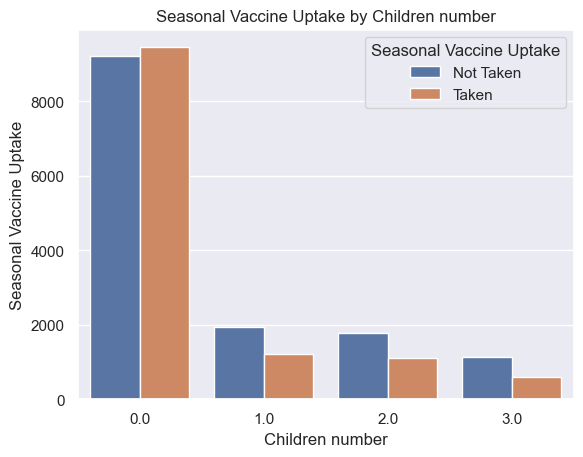

In [42]:
sns.countplot(x='household_children', hue='seasonal_vaccine', data=df)

plt.title('Seasonal Vaccine Uptake by Children number')
plt.ylabel('Seasonal Vaccine Uptake')
plt.xlabel('Children number')
plt.legend(title='Seasonal Vaccine Uptake',labels=['Not Taken', 'Taken'])

plt.show()

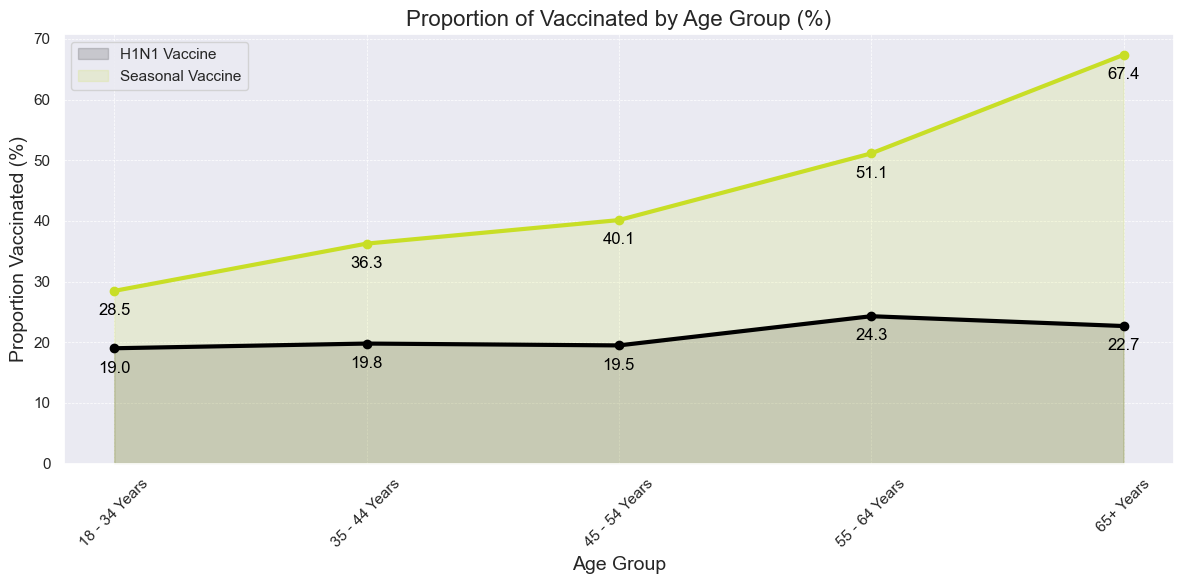

In [453]:
# new data_frame only for this chart
df_wh = df.copy()
age_graph = df_wh.groupby('age_group').agg(
    h1n1_vaccine=('h1n1_vaccine', 'mean'),
    seasonal_vaccine=('seasonal_vaccine', 'mean')
).reset_index()
# Convert proportions to percentages for krasota
age_graph['h1n1_vaccine'] *= 100
age_graph['seasonal_vaccine'] *= 100
# Set up cubehelix palette
palette = sns.cubehelix_palette(start=2, rot=0.5, dark=0.2, light=0.8, reverse=False)
# Colors for lines (in official skoltech collors for pontanutsya)
seasonal_color = '#C8DE26'  # (for seasonal vaccine)
h1n1_color = '#000000'  # for H1N1 vaccine)
plt.figure(figsize=(12, 6))
# Compound of underline space
plt.fill_between(age_graph['age_group'], 
                 age_graph['h1n1_vaccine'], 
                 color=h1n1_color, alpha=0.15, label='H1N1 Vaccine')  # Reduced transparency
plt.fill_between(age_graph['age_group'], 
                 age_graph['seasonal_vaccine'], 
                 color=seasonal_color, alpha=0.15, label='Seasonal Vaccine')  # Reduced transparency
# Add lines for better visualization with bright colors
plt.plot(age_graph['age_group'], 
         age_graph['h1n1_vaccine'], 
         color=h1n1_color, marker='o', linewidth=3)

plt.plot(age_graph['age_group'], 
         age_graph['seasonal_vaccine'], 
         color=seasonal_color, marker='o', linewidth=3)
# Label critical points
for i in range(len(age_graph)):
    plt.text(age_graph['age_group'][i], age_graph['h1n1_vaccine'][i] - 4,
             f"{age_graph['h1n1_vaccine'][i]:.1f}", ha='center', color='black')
    
    plt.text(age_graph['age_group'][i], age_graph['seasonal_vaccine'][i] - 4,
             f"{age_graph['seasonal_vaccine'][i]:.1f}", ha='center', color='black')
# Set titles and labels
plt.title('Proportion of Vaccinated by Age Group (%)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion Vaccinated (%)', fontsize=14)
# Rotate x-axis for krasota
plt.xticks(rotation=45)
# Set the lower limit of the Y-axis to 0 (because of nans we have -1 points)
def set_y_axis_start_zero(ax):
    """Sets the lower limit of the Y-axis to 0."""
    ax.set_ylim(bottom=0)
set_y_axis_start_zero(plt.gca())
# Add grid lines with squares in the background
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test1, y_lg_pred_proba1[:, 1])
roc_auc_logreg = auc(fpr_logreg_train, tpr_logreg_train)
fpr_xgb_train, tpr_xgb_train, _ = roc_curve(y_test1, y_xgb_pred_proba1[:, 1])
roc_auc_xgb = auc(fpr_xgb_train, tpr_xgb_train)
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_test1, y_rf_pred_proba1[:, 1])
roc_auc_rf = auc(fpr_rf_train, tpr_rf_train)
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue', lw=2,
         label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_xgb_train, tpr_xgb_train, color='green', lw=2,
         label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_rf_train, tpr_rf_train, color='red', lw=2,
         label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.grid(True)
plt.scatter(fpr_logreg_train, tpr_logreg_train, color='blue', s=20)
plt.scatter(fpr_xgb_train, tpr_xgb_train, color='green', s=20)
plt.scatter(fpr_rf_train, tpr_rf_train, color='red', s=20)
plt.title('Receiver Operating Characteristic (ROC) for h1n1 vaccine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [43]:
df.head(7)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0


In [44]:
y1 = df['h1n1_vaccine']
y2 = df['seasonal_vaccine']
X = df.drop(columns=['h1n1_vaccine','seasonal_vaccine']).copy()


In [45]:
columns = df.columns
for col in columns:
    print("\n", df[col].value_counts(dropna=False).sort_values(ascending=True))



 h1n1_concern
NaN       92
0.0     3296
3.0     4591
1.0     8153
2.0    10575
Name: count, dtype: int64

 h1n1_knowledge
NaN      116
0.0     2506
2.0     9487
1.0    14598
Name: count, dtype: int64

 behavioral_antiviral_meds
NaN       71
1.0     1301
0.0    25335
Name: count, dtype: int64

 behavioral_avoidance
NaN      208
0.0     7271
1.0    19228
Name: count, dtype: int64

 behavioral_face_mask
NaN       19
1.0     1841
0.0    24847
Name: count, dtype: int64

 behavioral_wash_hands
NaN       42
0.0     4650
1.0    22015
Name: count, dtype: int64

 behavioral_large_gatherings
NaN       87
1.0     9547
0.0    17073
Name: count, dtype: int64

 behavioral_outside_home
NaN       82
1.0     8981
0.0    17644
Name: count, dtype: int64

 behavioral_touch_face
NaN      128
0.0     8578
1.0    18001
Name: count, dtype: int64

 doctor_recc_h1n1
NaN     2160
1.0     5408
0.0    19139
Name: count, dtype: int64

 doctor_recc_seasonal
NaN     2160
1.0     8094
0.0    16453
Name: count, dtype: 

In [51]:
object_ranked_columns = X[['age_group', 'education', 'income_poverty']]
object_ranked_orig_test_columns = X_test_orig[['age_group', 'education', 'income_poverty']]

modes = object_ranked_columns.mode().iloc[0]
orig_test_modes = object_ranked_orig_test_columns.mode().iloc[0]

print("\nModes:\n", modes)

print("\nModes test:\n", orig_test_modes)


Modes:
 age_group                         65+ Years
education                  College Graduate
income_poverty    <= $75,000, Above Poverty
Name: 0, dtype: object

Modes test:
 age_group                         65+ Years
education                  College Graduate
income_poverty    <= $75,000, Above Poverty
Name: 0, dtype: object


In [147]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode(X_arg):

    ordinal_features = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
                     'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group','education','income_poverty',
                        'household_adults','household_children']
    
    object_ordinal_columns = X_arg[['age_group', 'education', 'income_poverty']]    

    float_columns = X_arg.select_dtypes(include=['float64'])

    X_filled = X_arg.copy()
    X_filled[float_columns.columns] = float_columns.fillna(-1) #filled nan with -1 for ranging float64 feature

    for column in object_ordinal_columns.columns:
        X_filled[column] = X_filled[column].fillna('None')
    
    X_res = X_filled.copy()
    
    h1n1_concern_order = [-1.0, 0.0, 1.0, 2.0, 3.0]
    h1n1_knowledge_order = [-1.0, 0.0, 1.0, 2.0]
    opinion_h1n1_vacc_effective_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    opinion_h1n1_risk_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    opinion_h1n1_sick_from_vacc_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    opinion_seas_vacc_effective_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    opinion_seas_risk_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    opinion_seas_sick_from_vacc_order = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
    age_group_order = ['None', '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
    education_order = ['None', '< 12 Years', '12 Years', 'Some College', 'College Graduate']
    income_poverty_order = ['Below Poverty', 'None', '<= $75,000, Above Poverty', '> $75,000']
    household_adults_order = [-1.0, 0.0, 1.0, 2.0, 3.0]
    household_children_order = [-1.0, 0.0, 1.0, 2.0, 3.0]

    categories = [
        h1n1_concern_order,
        h1n1_knowledge_order,
        opinion_h1n1_vacc_effective_order,
        opinion_h1n1_risk_order,
        opinion_h1n1_sick_from_vacc_order,
        opinion_seas_vacc_effective_order,
        opinion_seas_risk_order,
        opinion_seas_sick_from_vacc_order,
        age_group_order,
        education_order,
        income_poverty_order,
        household_adults_order,
        household_children_order
    ]
    
    
    encoder = OrdinalEncoder(categories=categories)
    
    encoded_values = encoder.fit_transform(X_res[ordinal_features])
    
    encoded_values_df = pd.DataFrame(encoded_values, columns=ordinal_features)

    X_res[ordinal_features] = encoded_values
    #X_res.loc[X_res.index, ordinal_features] = encoded_values


    return X_res


In [149]:
X_enc = ordinal_encode(X)
X_test_orig_enc = ordinal_encode(X_test_orig)

In [189]:
X_test_orig_enc

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,3.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",2.0,1.0,atmlpfrs,hfxkjkmi
26708,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Not Married,Rent,Employed,bhuqouqj,Non-MSA,4.0,1.0,atmlpfrs,xqwwgdyp
26709,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,Married,Own,Employed,lrircsnp,Non-MSA,2.0,1.0,nduyfdeo,pvmttkik
26710,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",2.0,1.0,NaN,NaN
26711,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,Not Married,Own,Employed,lzgpxyit,Non-MSA,1.0,2.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",2.0,2.0,NaN,NaN
53411,4.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,Married,Rent,Employed,qufhixun,Non-MSA,2.0,4.0,fcxhlnwr,vlluhbov
53412,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",2.0,1.0,NaN,NaN


In [155]:
columns = X_test_orig_enc.columns
for col in columns:
    print("\n", X_test_orig_enc[col].value_counts(dropna=False).sort_values(ascending=True))



 h1n1_concern
0.0       85
1.0     3199
4.0     4523
2.0     8158
3.0    10743
Name: count, dtype: int64

 h1n1_knowledge
0.0      122
1.0     2442
3.0     9515
2.0    14629
Name: count, dtype: int64

 behavioral_antiviral_meds
-1.0       79
 1.0     1322
 0.0    25307
Name: count, dtype: int64

 behavioral_avoidance
-1.0      213
 0.0     7159
 1.0    19336
Name: count, dtype: int64

 behavioral_face_mask
-1.0       19
 1.0     1849
 0.0    24840
Name: count, dtype: int64

 behavioral_wash_hands
-1.0       40
 0.0     4638
 1.0    22030
Name: count, dtype: int64

 behavioral_large_gatherings
-1.0       72
 1.0     9363
 0.0    17273
Name: count, dtype: int64

 behavioral_outside_home
-1.0       82
 1.0     8979
 0.0    17647
Name: count, dtype: int64

 behavioral_touch_face
-1.0      128
 0.0     8406
 1.0    18174
Name: count, dtype: int64

 doctor_recc_h1n1
-1.0     2160
 1.0     5466
 0.0    19082
Name: count, dtype: int64

 doctor_recc_seasonal
-1.0     2160
 1.0     8188
 0.0   

In [191]:
ordinal_features = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
                     'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group','education','income_poverty',
                        'household_adults','household_children']

X_dummy = pd.get_dummies(X_enc, columns=[col for col in X_enc.columns if col not in ordinal_features], drop_first=True, dtype=int)
X_orig_test_dummy = pd.get_dummies(X_test_orig_enc, columns=[col for col in X_test_orig_enc.columns if col not in ordinal_features], drop_first=True, dtype=int)

In [193]:
X_orig_test_dummy

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,3.0,3.0,5.0,1.0,1.0,5.0,1.0,1.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0
26708,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,1,0,0
26709,3.0,3.0,5.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
26710,2.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
26711,4.0,2.0,5.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2.0,2.0,4.0,2.0,2.0,4.0,2.0,1.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53411,4.0,2.0,4.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0
53412,1.0,2.0,4.0,3.0,1.0,4.0,3.0,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dummy, y1, test_size=0.2, random_state=314, shuffle=True, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_dummy, y2, test_size=0.2, random_state=314, shuffle=True, stratify=y2)

In [228]:
from sklearn.preprocessing import StandardScaler

In [232]:
def scale_ordinal_features(X_arg, ordinal_features):
    X_res = X_arg.copy()
    scaler = StandardScaler()
    X_res[ordinal_features] = scaler.fit_transform(X_res[ordinal_features])
    return X_res

In [244]:
X_train_sc1 = scale_ordinal_features(X_train1, ordinal_features)
X_train_sc2 = scale_ordinal_features(X_train2, ordinal_features)
X_test_sc1 = scale_ordinal_features(X_test1, ordinal_features)
X_test_sc2 = scale_ordinal_features(X_test2, ordinal_features)
X_orig_test_dummy_sc = scale_ordinal_features(X_orig_test_dummy, ordinal_features)

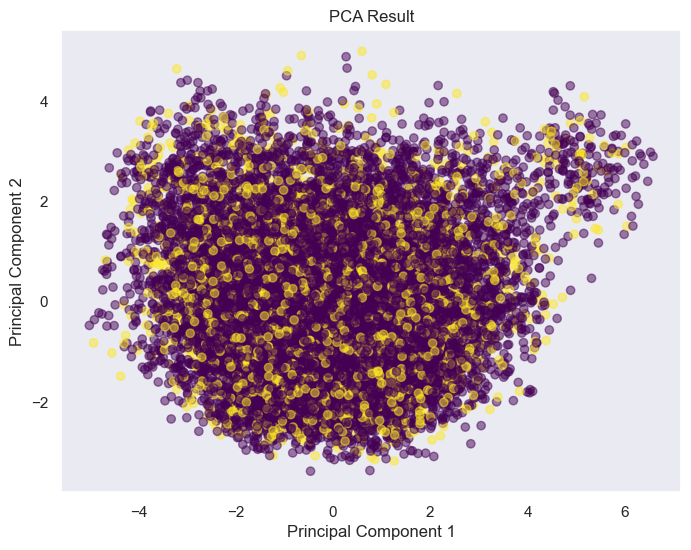

In [272]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(X_train_sc1)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = y_train1

plt.figure(figsize=(8, 6))
#plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'], alpha=0.5, cmap='viridis')

plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

In [161]:
from sklearn.metrics import roc_curve, auc
def plot_roc(fpr,tpr,label,target):
    plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue', label=label)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve. Target: ' + target)
    plt.legend()
    plt.show()

## Logistic Regression, unscaled ranked features; l2

In [397]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

logreg_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)

logreg_param_grid = {'C': np.logspace(-5, 5, endpoint=True, num=31)}


logreg_grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=logreg_param_grid,
    scoring='roc_auc',  
    cv=skf,
    verbose=1
)


### Target 2


In [400]:
logreg_grid_search.fit(X_train2, y_train2)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train2, y_train2)

y_lg_train_pred2 = logreg_model_best.predict(X_train2)
y_lg_train_pred_proba2 = logreg_model_best.predict_proba(X_train2)

y_lg_pred2 = logreg_model_best.predict(X_test2)
y_lg_pred_proba2 = logreg_model_best.predict_proba(X_test2)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


In [401]:
y_lg_orig_pred_proba2 = logreg_model_best.predict_proba(X_orig_test_dummy)

f1_score. Target 2:  0.7716719773691283
ROC-AUC score for Logistic Regression. Target 1:  0.8490469178783968


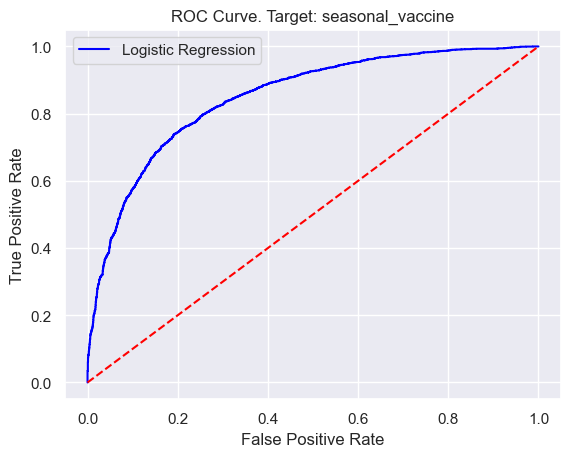

In [402]:

print("f1_score. Target 2: ", f1_score(y_test2, y_lg_pred2, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test2, y_lg_pred_proba2[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test2.name)

#if scoring auc
#f1_score. Target 2:  0.7716719773691283
#ROC-AUC score for Logistic Regression. Target 1:  0.8490469178783968

In [403]:
logreg_grid_search.best_score_

0.8489852068609857

In [404]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.21544346900318823, max_iter=5000)

### Target 1

In [406]:
#target 1
logreg_grid_search.fit(X_train1, y_train1)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train1, y_train1)

y_lg_train_pred1 = logreg_model_best.predict(X_train1)

y_lg_pred1 = logreg_model_best.predict(X_test1)
y_lg_pred_proba1 = logreg_model_best.predict_proba(X_test1)


Fitting 5 folds for each of 31 candidates, totalling 155 fits


In [407]:
y_lg_orig_pred_proba1 = logreg_model_best.predict_proba(X_orig_test_dummy)

In [408]:
print(logreg_grid_search.best_score_)
print(logreg_grid_search.best_estimator_)

0.8526494858104978
LogisticRegression(C=0.21544346900318823, max_iter=5000)


f1_score. Target 1:  0.73705401294131
ROC-AUC score for Logistic Regression. Target 1:  0.8570620185153965


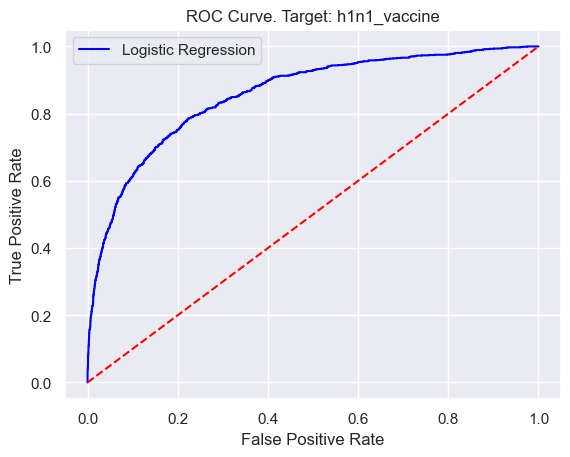

In [409]:
print("f1_score. Target 1: ", f1_score(y_test1, y_lg_pred1, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test1, y_lg_pred_proba1[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test1.name)

#for auc
#f1_score. Target 1:  0.73705401294131
#ROC-AUC score for Logistic Regression. Target 1:  0.8570620185153965


## Logistic Regression scaled ranked features, l2

In [371]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

logreg_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)

logreg_param_grid = {'C': np.logspace(-5, 5, endpoint=True, num=31)}

logreg_grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=logreg_param_grid,
    scoring='roc_auc',  
    cv=skf,
    verbose=1
)


### Target 2


In [373]:
logreg_grid_search.fit(X_train_sc2, y_train2)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train_sc2, y_train2)

y_lg_train_pred2 = logreg_model_best.predict(X_train_sc2)
y_lg_train_pred_proba2 = logreg_model_best.predict_proba(X_train_sc2)

y_lg_pred2 = logreg_model_best.predict(X_test_sc2)
y_lg_pred_proba2 = logreg_model_best.predict_proba(X_test_sc2)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


In [374]:
y_lg_orig_pred_proba2 = logreg_model_best.predict_proba(X_orig_test_dummy_sc)

f1_score. Target 2:  0.774563360395166
ROC-AUC score for Logistic Regression. Target 1:  0.848918051626778


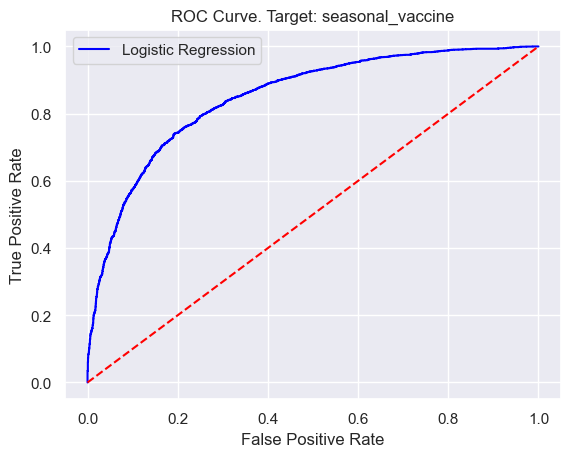

In [375]:

print("f1_score. Target 2: ", f1_score(y_test2, y_lg_pred2, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test2, y_lg_pred_proba2[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test2.name)

In [376]:
logreg_grid_search.best_score_

0.8489361635037884

In [377]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.21544346900318823, max_iter=5000)

### Target 1

In [379]:
#target 1
logreg_grid_search.fit(X_train_sc1, y_train1)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train_sc1, y_train1)

y_lg_train_pred1 = logreg_model_best.predict(X_train_sc1)

y_lg_pred1 = logreg_model_best.predict(X_test_sc1)
y_lg_pred_proba1 = logreg_model_best.predict_proba(X_test_sc1)


Fitting 5 folds for each of 31 candidates, totalling 155 fits


In [380]:
y_lg_orig_pred_proba1 = logreg_model_best.predict_proba(X_orig_test_dummy_sc)

In [381]:
print(logreg_grid_search.best_score_)
print(logreg_grid_search.best_estimator_)

0.8526793781520196
LogisticRegression(C=0.21544346900318823, max_iter=5000)


f1_score. Target 1:  0.7368329873054014
ROC-AUC score for Logistic Regression. Target 1:  0.8569979340076168


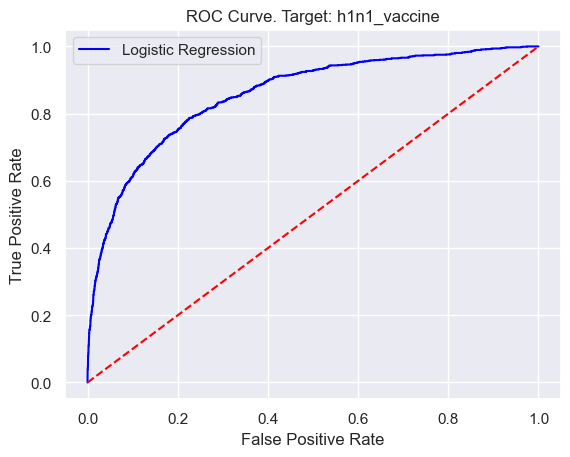

In [382]:
print("f1_score. Target 1: ", f1_score(y_test1, y_lg_pred1, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test1, y_lg_pred_proba1[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test1.name)

## Logistic Regression scaled ranked features, l1

In [164]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

logreg_model = LogisticRegression(penalty='l1', solver= 'liblinear', max_iter=5000)

logreg_param_grid = {'C': np.logspace(-5, 5, endpoint=True, num=31)}

logreg_grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=logreg_param_grid,
    scoring='roc_auc',  
    cv=skf,
    verbose=1
)


### Target 2


In [167]:
logreg_grid_search.fit(X_train_sc2, y_train2)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train_sc2, y_train2)

y_lg_train_pred2 = logreg_model_best.predict(X_train_sc2)
y_lg_train_pred_proba2 = logreg_model_best.predict_proba(X_train_sc2)

y_lg_pred2 = logreg_model_best.predict(X_test_sc2)
y_lg_pred_proba2 = logreg_model_best.predict_proba(X_test_sc2)

Fitting 5 folds for each of 93 candidates, totalling 465 fits


In [195]:
y_lg_orig_pred_proba2 = logreg_model_best.predict_proba(X_orig_test_dummy_sc)

f1_score. Target 2:  0.7714260455675432
ROC-AUC score for Logistic Regression. Target 1:  0.8489886111809429


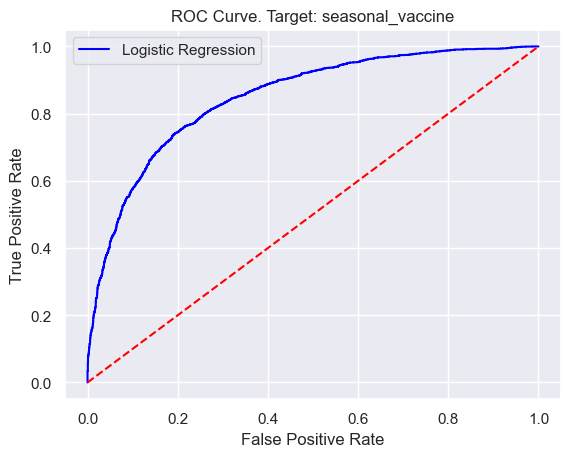

In [197]:

print("f1_score. Target 2: ", f1_score(y_test2, y_lg_pred2, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test2, y_lg_pred_proba2[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test2.name)

In [199]:
logreg_grid_search.best_score_

0.8489966068507766

In [201]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.46415888336127725, max_iter=5000, penalty='l1',
                   solver='liblinear')

### Target 1

In [204]:
#target 1
logreg_grid_search.fit(X_train_sc1, y_train1)
logreg_model_best = logreg_grid_search.best_estimator_
logreg_model_best.fit(X_train_sc1, y_train1)

y_lg_train_pred1 = logreg_model_best.predict(X_train_sc1)

y_lg_pred1 = logreg_model_best.predict(X_test_sc1)
y_lg_pred_proba1 = logreg_model_best.predict_proba(X_test_sc1)


Fitting 5 folds for each of 93 candidates, totalling 465 fits


In [205]:
y_lg_orig_pred_proba1 = logreg_model_best.predict_proba(X_orig_test_dummy_sc)

In [206]:
print(logreg_grid_search.best_score_)
print(logreg_grid_search.best_estimator_)

0.8526494858104978
LogisticRegression(C=0.21544346900318823, max_iter=5000)


f1_score. Target 1:  0.73705401294131
ROC-AUC score for Logistic Regression. Target 1:  0.8570620185153965


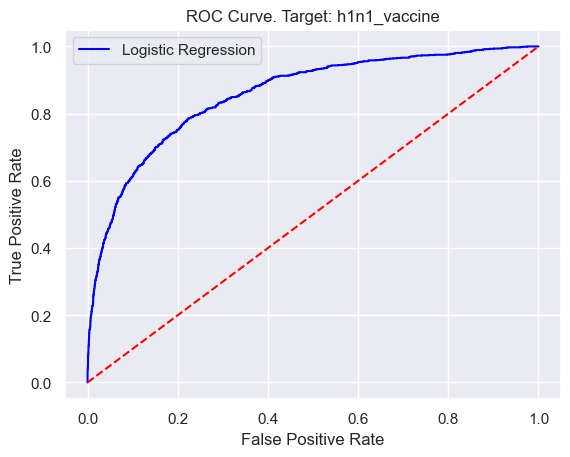

In [207]:
print("f1_score. Target 1: ", f1_score(y_test1, y_lg_pred1, average='macro'))

fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test1, y_lg_pred_proba1[:, 1]) #positive class proba
print("ROC-AUC score for Logistic Regression. Target 1: ", auc(fpr_logreg_train, tpr_logreg_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Logistic Regression', y_test1.name)

## Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rf_model = RandomForestClassifier(random_state=314)

rf_param_grid = {
    'n_estimators': [150, 175, 200, 225, 250],  # number of trees in the forest
    'max_depth': [3, 10, 15, 20, 25, 30,  35], #None
    #'min_samples_split': [2, 5, 10],  # min number of observations required to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # min number of observations required node be considred as a leaf
}

rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='f1_macro', #'roc_auc',  
    cv=skf,
    verbose=1
    
)

### Target 2

In [212]:
#target 2
rf_grid_search.fit(X_train2, y_train2)

rf_model_best = rf_grid_search.best_estimator_

rf_model_best.fit(X_train2, y_train2)

y_rf_train_pred2 = rf_model_best.predict(X_train2)

y_rf_pred2 = rf_model_best.predict(X_test2)
y_rf_pred_proba2 = rf_model_best.predict_proba(X_test2)

y_rt_orig_pred_proba2 = rf_model_best.predict_proba(X_orig_test_dummy)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [213]:
print(rf_grid_search.best_score_)
print(rf_grid_search.best_estimator_)

0.783071959941236
RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=225,
                       random_state=314)


f1_score. Target 2:  0.77634459129424
ROC-AUC score for Random Forest. Target 2:  0.8523365986492282


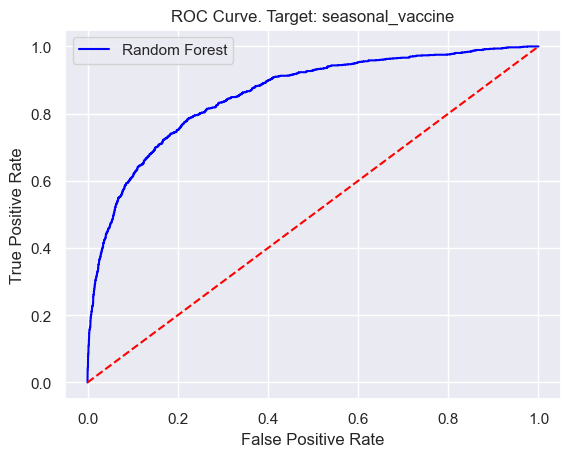

In [214]:
print("f1_score. Target 2: ", f1_score(y_test2, y_rf_pred2, average='macro'))

fpr_rf_train, tpr_rf_train, _ = roc_curve(y_test2, y_rf_pred_proba2[:, 1]) #positive class proba
print("ROC-AUC score for Random Forest. Target 2: ", auc(fpr_rf_train, tpr_rf_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Random Forest', y_test2.name)

### Target 1

In [220]:
#target 1
rf_grid_search.fit(X_train1, y_train1)

rf_model_best = rf_grid_search.best_estimator_

rf_model_best.fit(X_train1, y_train1)

y_rf_train_pred1 = rf_model_best.predict(X_train1)

y_rf_pred1 = rf_model_best.predict(X_test1)
y_rf_pred_proba1 = rf_model_best.predict_proba(X_test1)

y_rt_orig_pred_proba1 = rf_model_best.predict_proba(X_orig_test_dummy)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [221]:
print(rf_grid_search.best_score_)
print(rf_grid_search.best_estimator_)

0.7397839119502022
RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=225,
                       random_state=314)


f1_score. Target 1:  0.7354922937558
ROC-AUC score for Random Forest. Target 1:  0.8638771755486189


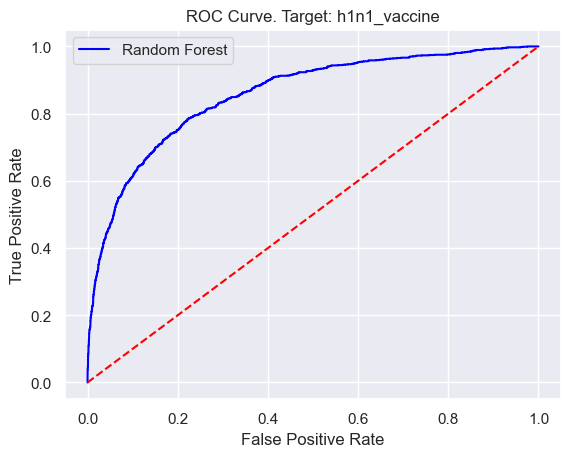

In [226]:
print("f1_score. Target 1: ", f1_score(y_test1, y_rf_pred1, average='macro'))

fpr_rf_train, tpr_rf_train, _ = roc_curve(y_test1, y_rf_pred_proba1[:, 1]) #positive class proba
print("ROC-AUC score for Random Forest. Target 1: ", auc(fpr_rf_train, tpr_rf_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'Random Forest', y_test1.name)

### XGBoost

In [436]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(random_state=314)
xgb_param_grid = {
    'n_estimators': [75, 100, 125, 150, 175, 200, 225, 250],  
    'max_depth': [3, 4, 5, 7, 10],  
    'min_child_weight': [1, 2, 4], 
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25] 
}
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='roc_auc', 
    cv=skf,
    verbose=1
)

### Target 2

In [438]:
xgb_grid_search.fit(X_train2, y_train2)
xgb_model_best = xgb_grid_search.best_estimator_
xgb_model_best.fit(X_train2, y_train2)
y_xgb_train_pred2 = xgb_model_best.predict(X_train2)
y_xgb_pred2 = xgb_model_best.predict(X_test2)
y_xgb_pred_proba2 = xgb_model_best.predict_proba(X_test2)
y_xgb_orig_pred_proba2 = xgb_model_best.predict_proba(X_orig_test_dummy)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [439]:
print(xgb_grid_search.best_score_)
print(xgb_grid_search.best_estimator_)

0.8630685820448296
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=314, ...)


f1_score. Target 2:  0.7777623513185152
ROC-AUC score for XGBoost. Target 2:  0.8595946557827497


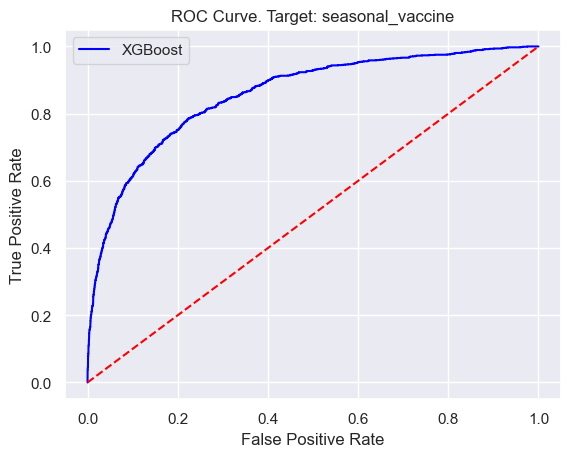

In [440]:
from sklearn.metrics import f1_score, roc_curve, auc
print("f1_score. Target 2: ", f1_score(y_test2, y_xgb_pred2, average='macro'))
fpr_xgb_train, tpr_xgb_train, _ = roc_curve(y_test2, y_xgb_pred_proba2[:, 1]) 
print("ROC-AUC score for XGBoost. Target 2: ", auc(fpr_xgb_train, tpr_xgb_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'XGBoost', y_test2.name)

### Target1

In [443]:
xgb_grid_search.fit(X_train1, y_train1)
xgb_model_best = xgb_grid_search.best_estimator_
xgb_model_best.fit(X_train1, y_train1)
y_xgb_train_pred1 = xgb_model_best.predict(X_train1)
y_xgb_pred1 = xgb_model_best.predict(X_test1)
y_xgb_pred_proba1 = xgb_model_best.predict_proba(X_test1)
y_xgb_orig_pred_proba1 = xgb_model_best.predict_proba(X_orig_test_dummy)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [444]:
print(xgb_grid_search.best_score_)
print(xgb_grid_search.best_estimator_)

0.8683302158755282
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=225, n_jobs=None,
              num_parallel_tree=None, random_state=314, ...)


f1_score. Target 1:  0.7490938677827363
ROC-AUC score for XGBoost. Target 1:  0.8732938285153024


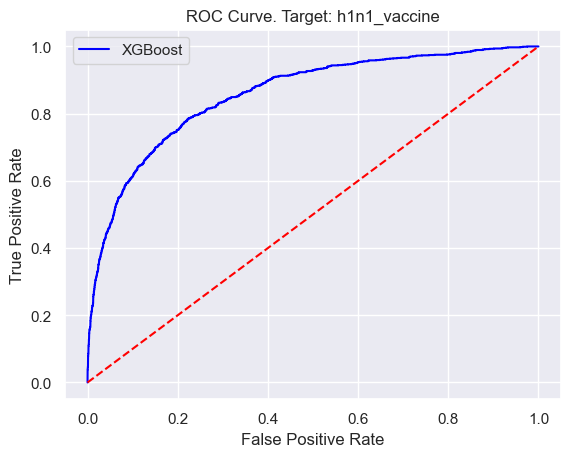

In [445]:
print("f1_score. Target 1: ", f1_score(y_test1, y_xgb_pred1, average='macro'))
fpr_xgb_train, tpr_xgb_train, _ = roc_curve(y_test1, y_xgb_pred_proba1[:, 1]) 
print("ROC-AUC score for XGBoost. Target 1: ", auc(fpr_xgb_train, tpr_xgb_train))
plot_roc(fpr_logreg_train, tpr_logreg_train, 'XGBoost', y_test1.name)

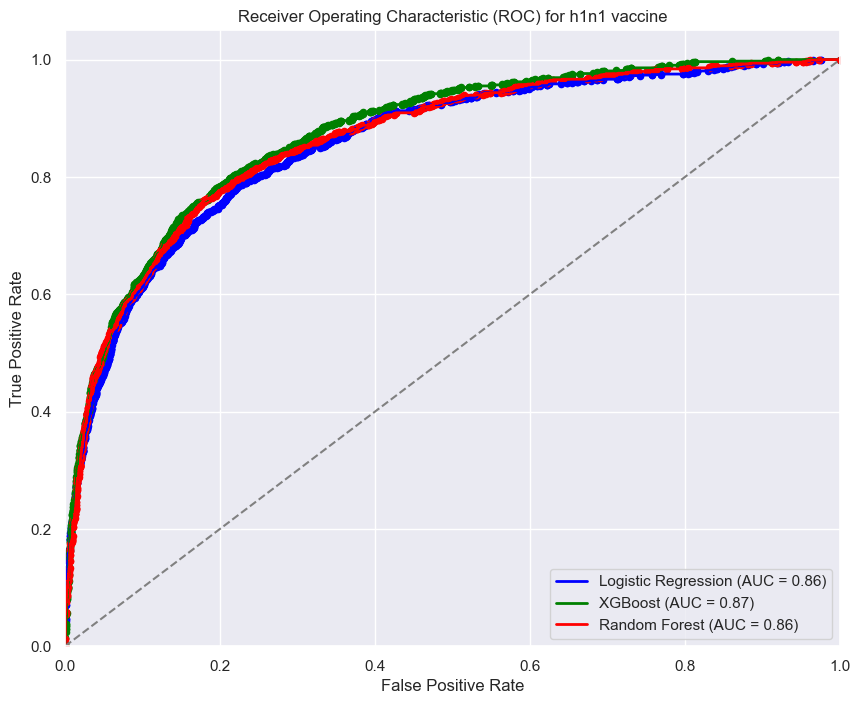

In [457]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for each model
fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test1, y_lg_pred_proba1[:, 1])
roc_auc_logreg = auc(fpr_logreg_train, tpr_logreg_train)

fpr_xgb_train, tpr_xgb_train, _ = roc_curve(y_test1, y_xgb_pred_proba1[:, 1])
roc_auc_xgb = auc(fpr_xgb_train, tpr_xgb_train)

fpr_rf_train, tpr_rf_train, _ = roc_curve(y_test1, y_rf_pred_proba1[:, 1])
roc_auc_rf = auc(fpr_rf_train, tpr_rf_train)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue', lw=2,
         label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_xgb_train, tpr_xgb_train, color='green', lw=2,
         label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_rf_train, tpr_rf_train, color='red', lw=2,
         label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Plotting the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adding grid lines
plt.grid(True)

# Plotting points on the ROC curves
plt.scatter(fpr_logreg_train, tpr_logreg_train, color='blue', s=20)
plt.scatter(fpr_xgb_train, tpr_xgb_train, color='green', s=20)
plt.scatter(fpr_rf_train, tpr_rf_train, color='red', s=20)

# Customizing the plot
plt.title('Receiver Operating Characteristic (ROC) for h1n1 vaccine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Show plot
plt.show()

f1_score. Target 2:  0.7777623513185152
ROC-AUC score for XGBoost. Target 2:  0.8595946557827497
f1_score. Target 2:  0.77634459129424
ROC-AUC score for Random Forest. Target 2:  0.8523365986492282
f1_score. Target 2:  0.7716719773691283
ROC-AUC score for Logistic Regression. Target 2:  0.8490469178783968


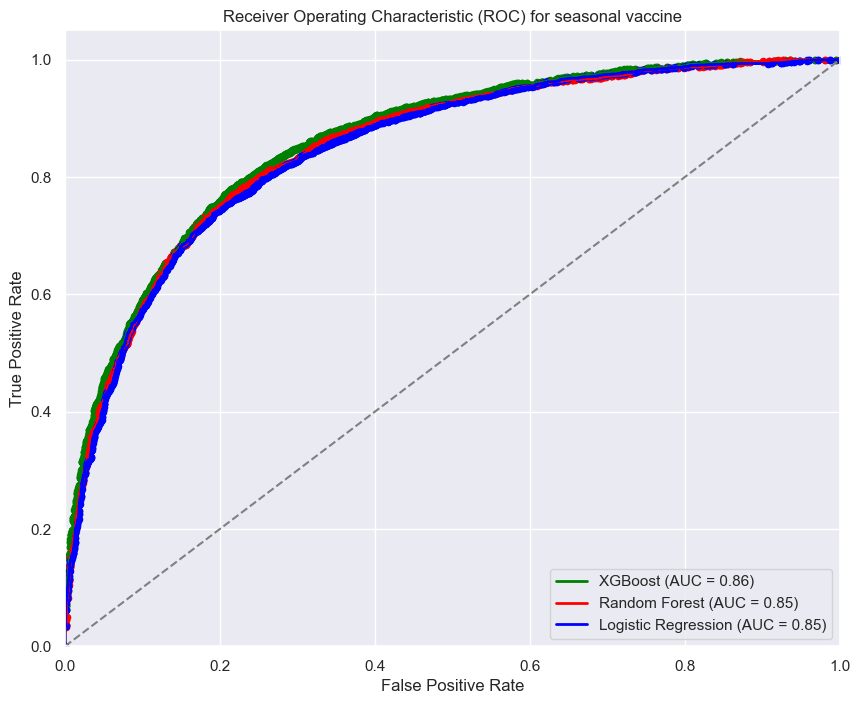

In [459]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc

# Calculate F1 scores
print("f1_score. Target 2: ", f1_score(y_test2, y_xgb_pred2, average='macro'))

# Calculate ROC curve and AUC for XGBoost
fpr_xgb_train, tpr_xgb_train, _ = roc_curve(y_test2, y_xgb_pred_proba2[:, 1])
roc_auc_xgb = auc(fpr_xgb_train, tpr_xgb_train)
print("ROC-AUC score for XGBoost. Target 2: ", roc_auc_xgb)

# Calculate F1 score for Random Forest
print("f1_score. Target 2: ", f1_score(y_test2, y_rf_pred2, average='macro'))

# Calculate ROC curve and AUC for Random Forest
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_test2, y_rf_pred_proba2[:, 1])
roc_auc_rf = auc(fpr_rf_train, tpr_rf_train)
print("ROC-AUC score for Random Forest. Target 2: ", roc_auc_rf)

# Calculate F1 score for Logistic Regression
print("f1_score. Target 2: ", f1_score(y_test2, y_lg_pred2, average='macro'))

# Calculate ROC curve and AUC for Logistic Regression
fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_test2, y_lg_pred_proba2[:, 1])
roc_auc_logreg = auc(fpr_logreg_train, tpr_logreg_train)
print("ROC-AUC score for Logistic Regression. Target 2: ", roc_auc_logreg)

# Plotting all ROC curves on one graph with consistent colors
plt.figure(figsize=(10, 8))

# Using consistent colors from the first plot
plt.plot(fpr_xgb_train, tpr_xgb_train, color='green', lw=2,
         label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_rf_train, tpr_rf_train, color='red', lw=2,
         label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue', lw=2,
         label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))

# Plotting the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adding grid lines
plt.grid(True)

# Plotting points on the ROC curves with consistent colors
plt.scatter(fpr_xgb_train, tpr_xgb_train, color='green', s=20)
plt.scatter(fpr_rf_train, tpr_rf_train, color='red', s=20)
plt.scatter(fpr_logreg_train, tpr_logreg_train, color='blue', s=20)

# Customizing the plot
plt.title('Receiver Operating Characteristic (ROC) for seasonal vaccine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Show plot
plt.show()

In [465]:
df_combined = pd.concat([
    pd.Series(X_orig_test_dummy_sc.index, name='respondent_id'),
    pd.Series(y_xgb_orig_pred_proba1[:, 1], name='h1n1_vaccine'), 
    pd.Series(y_xgb_orig_pred_proba2[:, 1], name='seasonal_vaccine')
], axis=1)

In [467]:
df_combined

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.106607,0.232209
1,26708,0.054112,0.034986
2,26709,0.160852,0.750212
3,26710,0.676536,0.878062
4,26711,0.324634,0.462920
...,...,...,...
26703,53410,0.315829,0.399165
26704,53411,0.130888,0.299378
26705,53412,0.178028,0.230738
26706,53413,0.024639,0.323266


In [ ]:
df_combined.to_csv('submission.csv', index=False)
